In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from skimpy import skim

In [2]:
# to read the data from google playstore
ps=pd.read_csv("googleplaystore.csv")

In [3]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
ps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# If all columns are not visible, use the following code
pd.set_option('display.max_columns', None)

In [7]:
#Clean the dataset for columns
ps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
ps['Installs']=ps['Installs'].str.replace(',','')
ps['Installs']=ps['Installs'].str.replace('+','')

C:\Users\adeel\AppData\Local\Temp\ipykernel_13684\1435527586.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ps['Installs']=ps['Installs'].str.replace('+','')


In [9]:
ps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [10]:
ps['Size']=ps['Size'].str.replace('G','000000000')
ps['Size']=ps['Size'].str.replace('k','000')
ps['Size']=ps['Size'].str.replace('M','000000')

In [11]:
ps['Size'].unique()

array(['19000000', '14000000', '8.7000000', '25000000', '2.8000000',
       '5.6000000', '29000000', '33000000', '3.1000000', '28000000',
       '12000000', '20000000', '21000000', '37000000', '2.7000000',
       '5.5000000', '17000000', '39000000', '31000000', '4.2000000',
       '7.0000000', '23000000', '6.0000000', '6.1000000', '4.6000000',
       '9.2000000', '5.2000000', '11000000', '24000000',
       'Varies with device', '9.4000000', '15000000', '10000000',
       '1.2000000', '26000000', '8.0000000', '7.9000000', '56000000',
       '57000000', '35000000', '54000000', '201000', '3.6000000',
       '5.7000000', '8.6000000', '2.4000000', '27000000', '2.5000000',
       '16000000', '3.4000000', '8.9000000', '3.9000000', '2.9000000',
       '38000000', '32000000', '5.4000000', '18000000', '1.1000000',
       '2.2000000', '4.5000000', '9.8000000', '52000000', '9.0000000',
       '6.7000000', '30000000', '2.6000000', '7.1000000', '3.7000000',
       '22000000', '7.4000000', '6.4000000

In [12]:
ps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [13]:
ps['Size']=pd.to_numeric(ps['Size'],errors='coerce')

In [14]:
ps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1696
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [15]:
ps['Size_mb']=0

In [16]:
PS['Size']=ps['Size'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
ps['Size_mb']=ps['Size'].apply(lambda x: x/1000000)

In [ ]:
ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.000009
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.000003


In [ ]:
ps.describe()

,Rating,Size,Size_mb
count,9367.000000,1.084100e+04,10841.000000
mean,4.193338,1.957748e+07,19.577482
std,0.537431,2.208278e+07,22.082777
min,1.000000,1.000000e+00,0.000001
25%,4.000000,6.800000e+00,0.000007
50%,4.300000,1.800000e+07,18.000000
75%,4.500000,2.600000e+07,26.000000
max,19.000000,1.000000e+08,100.000000


<Axes: xlabel='Category', ylabel='count'>

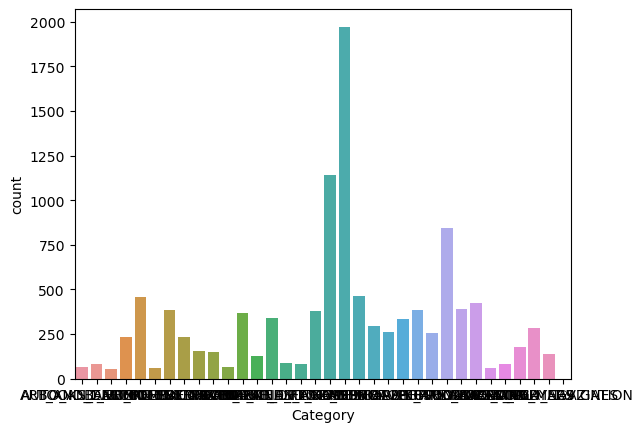

In [ ]:
sns.countplot(x='Category',data=ps)

In [ ]:
ps['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'GAME'),
  Text(2, 0, 'TOOLS'),
  Text(3, 0, 'MEDICAL'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'PRODUCTIVITY'),
  Text(6, 0, 'PERSONALIZATION'),
  Text(7, 0, 'COMMUNICATION'),
  Text(8, 0, 'SPORTS'),
  Text(9, 0, 'LIFESTYLE')])

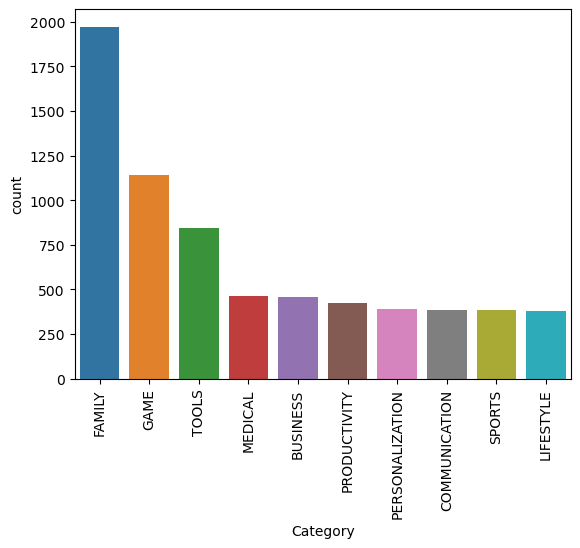

In [ ]:
# Make plot for the top 10 categories
sns.countplot(x='Category',data=ps,order=ps['Category'].value_counts().iloc[:10].index)
# rotate the x-axis labels
plt.xticks(rotation=90)

In [ ]:
# make plot in plotly
fig=px.bar(ps,x='Category',color='Category',title='Top 10 Categories')

In [51]:
fig

In [17]:
ps.duplicated().sum()

483

In [18]:
ps.duplicated(subset=['App']).sum()

1181